In [1]:
# Ria Patel - June 28, 2019
# Manipulates circuit with 2 qubits using Hadamard Gates

# Imports needed libraries/tools
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram

# Used for mpl drawing at the end
style = {'backgroundcolor':'#FB7685'}

# Sets up the registers and the circuit
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

{'00': 1024}


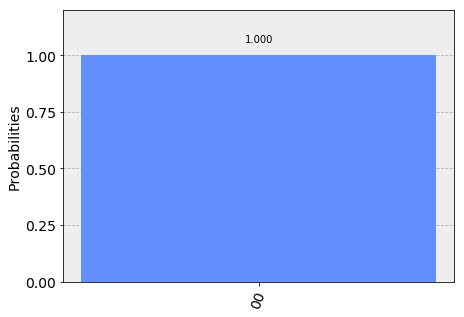

In [2]:
# Measuring qubits before Hadamard Gate is applied
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# Simulates the circuit & plots histogram
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

{'00': 507, '01': 517}


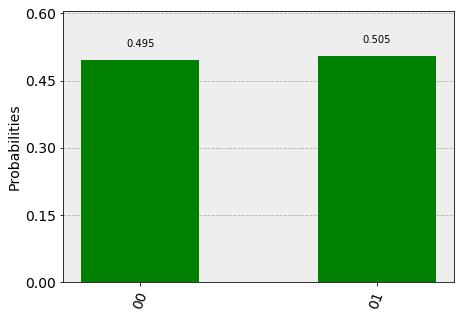

In [3]:
qc.barrier(q)

# Applies Hadamard Gate to 1st qubit
qc.h(q[0])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# Simulates the circuit & plots histogram
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result, color = 'green')

{'10': 513, '00': 511}


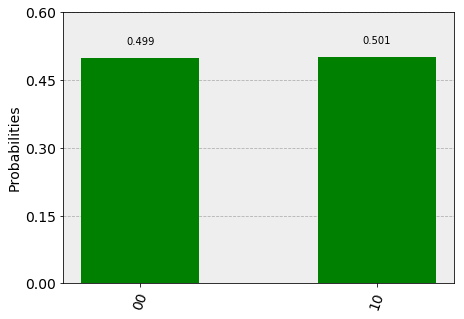

In [4]:
qc.barrier(q)

# Resets 1st qubit
qc.reset(q[0])

# Applies Hadamard Gate to 2nd qubit
qc.h(q[1])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# Simulates the circuit & plots histogram
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result, color = 'green')

{'10': 249, '11': 254, '00': 283, '01': 238}


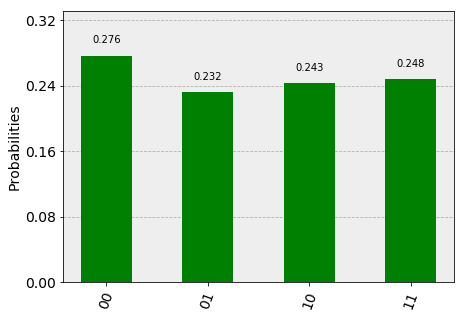

In [5]:
qc.barrier(q)

# Resets 2nd qubit
qc.reset(q[1])

# Applies Hadamard Gate to both qubits
qc.h(q[0])
qc.h(q[1])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# Simulates the circuit & plots histogram
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result, color = 'green')

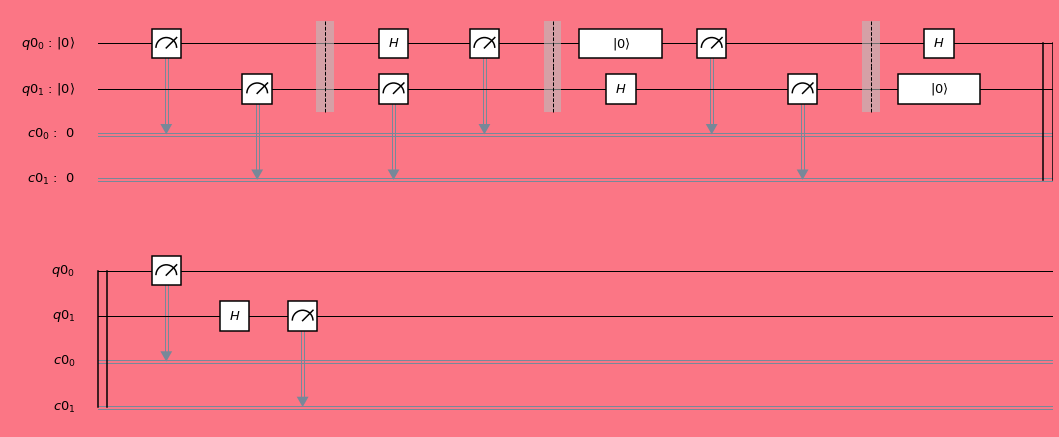

In [6]:
qc.draw(output='mpl', style=style)